<a href="https://colab.research.google.com/github/coen2812023/Classification/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import random
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier



np.random.seed(0)

url = 'https://raw.githubusercontent.com/coen2812023/Classification/main/customer_churn.csv'
df = pd.read_csv(url, index_col=0)




In [22]:
df.head()

,age,gender,tenure,balance,products,credit_score,active_member,estimated_salary,location,phone,loan,security_deposit,cd_account,online_banking,churned
customer_id,,,,,,,,,,,,,,,
1,62,Female,106,18191,3,584,1,111941,Canada,Android,1,0,1,1,1
2,65,Male,238,3121,4,624,0,52957,Mexico,Android,1,1,0,1,0
3,71,Male,119,13585,5,326,0,68870,Canada,iOS,1,0,0,1,0
4,18,Male,25,4886,5,524,0,59849,Mexico,Android,0,1,1,0,1
5,21,Female,124,9922,3,548,1,98727,USA,Android,1,0,0,1,0


In [27]:
df.churned.value_counts()

0    51
1    49
Name: churned, dtype: int64

In [23]:

# Split the dataset into features and target variable
X = df. iloc[:,1:] # select all rows and all columns except the first one
X = X.iloc[:, :-1] # select all rows and all columns except the last one
X = pd.get_dummies(X, drop_first=True)
y = df.iloc[:, -1] # select all rows and only the last column

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Create the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict labels for test data
predictions = knn.predict(X_test)

# Evaluate the classifier using accuracy
acc = accuracy_score(y_test,predictions)
print("Accuracy:", acc)

Accuracy: 0.5333333333333333


In [25]:

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

Accuracy: 0.4666666666666667
Confusion Matrix:
[[7 8]
 [8 7]]


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [16]:

print(f"accuracy score is {accuracy_score(y_test, y_pred )}")
print(metrics.classification_report(y_test, y_pred))

accuracy score is 0.5666666666666667
              precision    recall  f1-score   support

           0       0.70      0.41      0.52        17
           1       0.50      0.77      0.61        13

    accuracy                           0.57        30
   macro avg       0.60      0.59      0.56        30
weighted avg       0.61      0.57      0.56        30



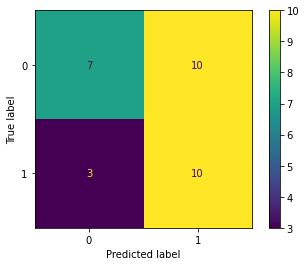

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

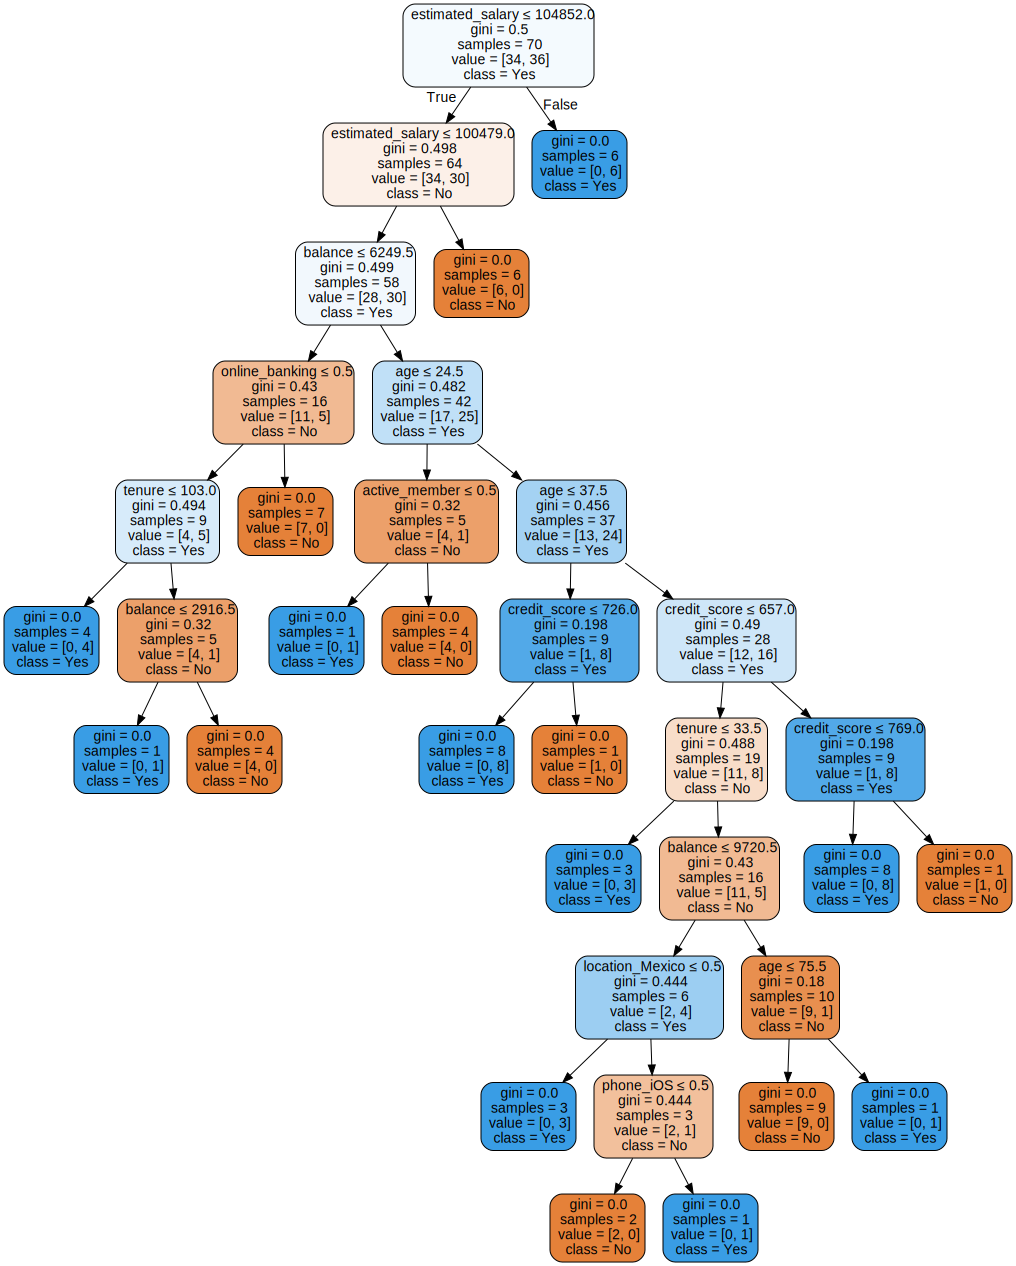

In [12]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph